# Prediction March Madness

## Import Libs

In [1]:
import pandas as pd #dataframes
import matplotlib.pyplot as plt 
import numpy as np # n-dim object support
# do ploting inline instead of in a separate window
%matplotlib inline
import random

## Load and review data

In [2]:
df_school = pd.read_csv("../Scraper/school_records.csv")
df_ps_game = pd.read_csv("../Scraper/post_season_game_records.csv")

In [3]:
df_ps_game.shape

(567, 7)

In [4]:
df_school.shape

(3497, 21)

In [5]:
df_school.head(5)

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
0,2011.0,Air Force,22.562500,13.062500,6.625000,5.843750,28.504883,15.437500,6.250000,2.593750,...,17.593750,64.812500,65.062500,0.471,0.377,0.705,0.500,0.375000,2.71,3.31
1,2011.0,Akron,24.777778,12.694444,7.861111,10.083333,34.108796,14.444444,6.666667,3.583333,...,19.222222,70.111111,65.694444,0.430,0.361,0.704,0.639,0.562500,2.15,-1.02
2,2011.0,Alabama A&M,22.607143,14.892857,4.464286,12.392857,37.343112,12.107143,8.321429,5.392857,...,20.071429,64.571429,66.785714,0.396,0.288,0.624,0.464,0.555556,-15.19,-11.75
3,2011.0,Alabama-Birmingham,24.387097,11.870968,7.709677,11.354839,35.407908,13.548387,5.290323,3.129032,...,16.580645,68.354839,62.580645,0.438,0.342,0.717,0.710,0.750000,8.55,2.78
4,2011.0,Alabama State,20.800000,15.000000,4.714286,13.142857,35.938776,11.542857,7.285714,4.657143,...,22.200000,61.314286,63.828571,0.395,0.283,0.603,0.486,0.611111,-13.37,-10.31


In [6]:
df_ps_game.head(5)

,year,team_1_name,team_1_score,team_1_seed,team_2_name,team_2_score,team_2_seed
0,2011,UTSA,46.0,16.0,Ohio State,75.0,1.0
1,2011,Villanova,57.0,9.0,George Mason,61.0,8.0
2,2011,Clemson,76.0,12.0,West Virginia,84.0,5.0
3,2011,Princeton,57.0,13.0,Kentucky,59.0,4.0
4,2011,Xavier,55.0,6.0,Marquette,66.0,11.0


## Check for nulls

In [7]:
df_school.isnull().values.any()

False

In [8]:
df_ps_game.isnull().values.any()

False

## How to query the dataframes for specific column values

In [9]:
df_school[(df_school['year'] == 2011) & (df_school['team_name'] == "Air Force")]

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
0,2011.0,Air Force,22.5625,13.0625,6.625,5.84375,28.504883,15.4375,6.25,2.59375,...,17.59375,64.8125,65.0625,0.471,0.377,0.705,0.5,0.375,2.71,3.31


## Get team stats for post-season games

In [10]:
import shared
ps_team_stats_df = shared.get_team_stats_df(df_school, df_ps_game, True)

2011
LIU
2011
UNC Asheville
2012
UNC Asheville
2012
LIU
2012
Long Beach State
2012
NC State
2012
NC State
2012
NC State
2013
NC State
2013
California
2013
California
2014
NC State
2015
NC State
2015
NC State
2015
NC State
2016
UNC Wilmington
2016
California
2016
UNC Asheville
2017
UNC Wilmington
2018
UNC Greensboro
2018
Penn
2018
NC State
2018
TCU
2018
UMBC
2018
UMBC
542


In [11]:
ps_team_stats_df.head(5)

,team_name_1,fg_pg_1,ft_pg_1,three_pt_pg_1,orb_pg_1,drb_pg_1,ast_pg_1,stl_pg_1,blk_pg_1,tov_pg_1,...,pt_pg_2,opnt_pt_pg_2,fg_pct_2,three_p_pct_2,ft_pct_2,wl_pct_2,conf_wl_pct_2,srs_2,sos_2,t1_win
0,Texas-San Antonio,23.588235,16.058824,6.882353,10.647059,34.569204,12.647059,7.058824,2.235294,13.558824,...,77.135135,59.675676,0.494,0.423,0.701,0.919,0.888889,25.84,8.38,False
1,Villanova,24.121212,17.636364,6.363636,12.181818,36.691460,13.636364,6.303030,3.787879,11.878788,...,72.764706,62.470588,0.471,0.395,0.689,0.794,0.888889,11.66,1.37,False
2,Clemson,23.823529,14.500000,6.382353,11.294118,34.285467,13.088235,8.000000,4.735294,13.205882,...,69.787879,64.666667,0.429,0.337,0.711,0.636,0.611111,16.15,11.03,False
3,Princeton,24.625000,13.937500,6.031250,9.843750,34.223633,13.343750,5.968750,4.187500,12.156250,...,74.868421,63.473684,0.459,0.397,0.710,0.763,0.625000,20.30,8.91,False
4,Xavier,24.500000,17.656250,5.406250,10.250000,34.992188,13.250000,5.437500,3.062500,12.062500,...,75.189189,68.810811,0.465,0.349,0.696,0.595,0.500000,14.89,8.51,False


## Concat the team stats with the post-season game data

In [12]:
ps_game_w_team_stats = pd.concat([df_ps_game, ps_team_stats_df], axis=1, join='inner')

In [13]:
ps_game_w_team_stats.head(3)

,year,team_1_name,team_1_score,team_1_seed,team_2_name,team_2_score,team_2_seed,team_name_1,fg_pg_1,ft_pg_1,...,pt_pg_2,opnt_pt_pg_2,fg_pct_2,three_p_pct_2,ft_pct_2,wl_pct_2,conf_wl_pct_2,srs_2,sos_2,t1_win
0,2011,UTSA,46.0,16.0,Ohio State,75.0,1.0,Texas-San Antonio,23.588235,16.058824,...,77.135135,59.675676,0.494,0.423,0.701,0.919,0.888889,25.84,8.38,False
1,2011,Villanova,57.0,9.0,George Mason,61.0,8.0,Villanova,24.121212,17.636364,...,72.764706,62.470588,0.471,0.395,0.689,0.794,0.888889,11.66,1.37,False
2,2011,Clemson,76.0,12.0,West Virginia,84.0,5.0,Clemson,23.823529,14.500000,...,69.787879,64.666667,0.429,0.337,0.711,0.636,0.611111,16.15,11.03,False


In [14]:

ps_game_w_team_stats.shape

(542, 48)

## Check true/false ration

In [15]:
t1_win_map = {True:1, False:0}
ps_game_w_team_stats['t1_win'] = ps_game_w_team_stats['t1_win'].map(t1_win_map)
num_true = len(ps_game_w_team_stats.loc[ps_game_w_team_stats['t1_win'] == True])
num_false = len(ps_game_w_team_stats.loc[ps_game_w_team_stats['t1_win'] == False])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false))*100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false))*100))

Number of True cases: 266 (49.08%)
Number of False cases: 276 (50.92%)


## Setup training, validation, and testing splits

In [16]:
import sklearn.model_selection

ps_predict_class_names = ['t1_win']
ps_x = ps_game_w_team_stats[shared.ps_feature_col_names].values
ps_y = ps_game_w_team_stats[shared.ps_predict_class_names].values
split_test_size = 0.30

ps_x_train, ps_x_test, ps_y_train, ps_y_test = sklearn.model_selection.train_test_split(ps_x, ps_y, test_size=split_test_size, random_state=42)

In [17]:
print("{0:0.2f}% in training set".format((len(ps_x_train)/len(ps_game_w_team_stats.index))*100))
print("{0:0.2f}% in test set".format((len(ps_x_test)/len(ps_game_w_team_stats.index))*100))

69.93% in training set
30.07% in test set


## Imput with the mean

In [18]:
import sklearn.impute

#Impute with mean all 0 readings
fill_0 = sklearn.impute.SimpleImputer(missing_values=0, strategy="mean")

ps_x_train = fill_0.fit_transform(ps_x_train)
ps_x_test = fill_0.fit_transform(ps_x_test)

# TODO : impute incorrect negative values such anything other than (SOS and SRS

## Training Baive Bayes mode

In [19]:
from sklearn.naive_bayes import GaussianNB

ps_nb_model = GaussianNB()
ps_nb_model.fit(ps_x_train, ps_y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

### Perfrormance on Testing Data

In [20]:

ps_nb_predict_test = ps_nb_model.predict(ps_x_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(ps_y_test, ps_nb_predict_test)))

Accuracy: 0.7117


In [21]:
print("Ps - Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(ps_y_test, ps_nb_predict_test, labels=[1, 0])))
print("")

print("PS -Classification Report")
print(metrics.classification_report(ps_y_test, ps_nb_predict_test, labels=[1, 0]))

Ps - Confusion Matrix
[[49 17]
 [30 67]]

PS -Classification Report
              precision    recall  f1-score   support

           1       0.62      0.74      0.68        66
           0       0.80      0.69      0.74        97

    accuracy                           0.71       163
   macro avg       0.71      0.72      0.71       163
weighted avg       0.73      0.71      0.71       163



## Random Forsest

In [22]:
from sklearn.ensemble import RandomForestClassifier
ps_rf_model = RandomForestClassifier(random_state=42)
ps_rf_model.fit(ps_x_train, ps_y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [23]:
ps_rf_predict_test = ps_rf_model.predict(ps_x_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(ps_y_test, ps_rf_predict_test))) # Will be low because of over-fitting

Accuracy: 0.7055


## Logistic Regression

/Users/njp020/.local/share/virtualenvs/MachineLearningMarchMadness-zhgGFGW3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/njp020/.local/share/virtualenvs/MachineLearningMarchMadness-zhgGFGW3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

/Users/njp020/.local/share/virtualenvs/MachineLearningMarchMadness-zhgGFGW3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/njp020/.local/share/virtualenvs/MachineLearningMarchMadness-zhgGFGW3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

/Users/njp020/.local/share/virtualenvs/MachineLearningMarchMadness-zhgGFGW3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/njp020/.local/share/virtualenvs/MachineLearningMarchMadness-zhgGFGW3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

/Users/njp020/.local/share/virtualenvs/MachineLearningMarchMadness-zhgGFGW3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/njp020/.local/share/virtualenvs/MachineLearningMarchMadness-zhgGFGW3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

1st max valu of 0.773 occured at C=0.100


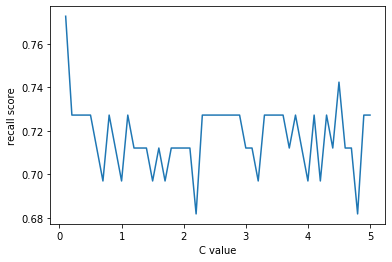

In [24]:
from sklearn.linear_model import LogisticRegression
# Setting up regularization Params
def get_best_score_C_val_for_LR(x_tr, y_tr, x_tst, y_tst):
    C_start = 0.1
    C_end = 5
    C_inc = 0.1
    C_values, recall_scores = [], []
    C_val = C_start
    best_recall_score = 0

    while (C_val < C_end):
        C_values.append(C_val)
        lr_model_loop = LogisticRegression(C=C_val, random_state=42)
        lr_model_loop.fit(x_tr, y_tr.ravel())
        lr_predict_loop_test = lr_model_loop.predict(x_tst)
        recall_score = metrics.recall_score(y_tst, lr_predict_loop_test)
        recall_scores.append(recall_score)
        if (recall_score > best_recall_score):
            best_recall_score = recall_score
            best_lr_predict_test = lr_predict_loop_test
        C_val = C_val + C_inc
    best_score_C_val = C_values[recall_scores.index(best_recall_score)]
    print("1st max valu of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))
    %matplotlib inline
    plt.plot(C_values, recall_scores, "-")
    plt.xlabel("C value")
    plt.ylabel("recall score")
    return best_score_C_val
ps_best_score_C_val = get_best_score_C_val_for_LR(ps_x_train, ps_y_train, ps_x_test, ps_y_test)

In [25]:

ps_lr_model = LogisticRegression(class_weight="balanced", C=ps_best_score_C_val, random_state=42)
ps_lr_model.fit(ps_x_train, ps_y_train.ravel())


/Users/njp020/.local/share/virtualenvs/MachineLearningMarchMadness-zhgGFGW3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
ps_lr_predict_test = ps_lr_model.predict(ps_x_test)
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(ps_y_test, ps_lr_predict_test)))

Accuracy: {0:.4f} 0.6809815950920245


## Logistic Regression with Cross Validation

In [27]:
from sklearn.linear_model import LogisticRegressionCV
ps_lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced") #Set number of folds
ps_lr_cv_model.fit(ps_x_train, ps_y_train.ravel())


/Users/njp020/.local/share/virtualenvs/MachineLearningMarchMadness-zhgGFGW3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [28]:
ps_lr_cv_predict_test = ps_lr_cv_model.predict(ps_x_test)
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(ps_y_test, ps_lr_cv_predict_test)))

Accuracy: {0:.4f} 0.7055214723926381


## XG Boost

In [29]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV   #Perforing grid search

xgb_model = xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_model.fit(ps_x_train, ps_y_train.ravel())

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [30]:
xgb_test = xgb_model.predict(ps_x_test)
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(ps_y_test, xgb_test)))

Accuracy: {0:.4f} 0.6932515337423313


In [31]:
# Optimize Hyper Parameters
param_test1 = {
 'max_depth':range(1,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(ps_x_train, ps_y_train.ravel())
gsearch1.best_score_, gsearch1.best_params_

/Users/njp020/.local/share/virtualenvs/MachineLearningMarchMadness-zhgGFGW3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


(0.8158174603174603, {'max_depth': 3, 'min_child_weight': 5})

In [32]:
param_test2 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=1,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(ps_x_train, ps_y_train.ravel())
gsearch2.best_score_, gsearch2.best_params_

/Users/njp020/.local/share/virtualenvs/MachineLearningMarchMadness-zhgGFGW3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


(0.8027936507936507, {'gamma': 0.0})

In [33]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=1,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(ps_x_train, ps_y_train.ravel())
gsearch3.best_score_, gsearch3.best_params_

/Users/njp020/.local/share/virtualenvs/MachineLearningMarchMadness-zhgGFGW3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


(0.8055436507936508, {'colsample_bytree': 0.8, 'subsample': 0.9})

In [34]:
param_test4 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=1,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(ps_x_train, ps_y_train.ravel())
gsearch4.best_score_, gsearch4.best_params_

/Users/njp020/.local/share/virtualenvs/MachineLearningMarchMadness-zhgGFGW3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


(0.8042777777777778, {'reg_alpha': 0.05})

In [35]:
xgb_model = xgb.XGBClassifier( learning_rate =0.01, n_estimators=500, max_depth=1,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.6, reg_alpha=.005,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
xgb_model.fit(ps_x_train, ps_y_train.ravel())
xgb_test = xgb_model.predict(ps_x_test)
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(ps_y_test, xgb_test)))

Accuracy: {0:.4f} 0.7116564417177914


# We have trained our models, not experiment with them to produce your bracket!

In [36]:
# Setup This years bracket regions
# TODO: automate this with the data received from the scraper

school_names_south = [
    # south region
    ('Virginia', 1),('Gardner-Webb', 16),
    ('Ole Miss', 8), ('Oklahoma', 9),
    ('Wisconsin',5), ('Oregon', 12),
    ('Kansas State',4), ('UC-Irvine', 13),
    ('Villanova', 6), ("Saint Mary's", 11),
    ('Purdue',3), ('Old Dominion',14),
    ('Cincinnati',7),('Iowa',10),
    ('Tennessee',2), ('Colgate',15)
    ]
school_names_west = [
    # west region
    ('Gonzaga', 1),('Prairie View',16), #or 'Texas Southern',
    ('Syracuse', 8),('Baylor', 9),
    ('Marquette',5), ('Murray State', 12),
    ('Florida State',4), ('Vermont',13),
    ('Buffalo',6),('Arizona State',11), # or
    ('Texas Tech', 3),('Northern Kentucky', 14),
    ('Nevada',7),('Florida',10),
    ('Michigan',2),('Montana',15)
    ]
school_names_east = [
    # east region
    ('Duke',1),('North Carolina Central',16), # or 'Radford',
    ('VCU',8), ('UCF',9),
    ('Mississippi State',5), ('Liberty',12),
    ('Virginia Tech',4), ('Saint Louis',13),
    ('Maryland',6), ('Temple',11), # or 'UCLA',
    ('LSU',3), ('Yale',14),
    ('Louisville',7), ('Minnesota',10),
    ('Michigan State', 2), ('Bradley',15)
    ]
school_names_midwest = [
    # mid-west region
    ('UNC', 1),('Iona', 16),
    ('Utah State', 8), ('Washington', 9),
    ('Auburn',5), ('New Mexico State', 12),
    ('Kansas',4), ('Northeastern', 13),
    ('Iowa State', 6), ('Ohio State', 11),
    ('Houston',3), ('Georgia State',14),
    ('Wofford',7),('Seton Hall',10),
    ('Kentucky',2), ('Abilene Christian',15)
    ]

# 2019 Bracket below
# school_names_south = [
#     # south region
#     ('Virginia', 1),('Gardner-Webb', 16),
#     ('Ole Miss', 8), ('Oklahoma', 9),
#     ('Wisconsin',5), ('Oregon', 12),
#     ('Kansas State',4), ('UC-Irvine', 13),
#     ('Villanova', 6), ("Saint Mary's", 11),
#     ('Purdue',3), ('Old Dominion',14),
#     ('Cincinnati',7),('Iowa',10),
#     ('Tennessee',2), ('Colgate',15)
#     ]
# school_names_west = [
#     # west region
#     ('Gonzaga', 1),('Prairie View',16), #or 'Texas Southern',
#     ('Syracuse', 8),('Baylor', 9),
#     ('Marquette',5), ('Murray State', 12),
#     ('Florida State',4), ('Vermont',13),
#     ('Buffalo',6),('Arizona State',11), # or
#     ('Texas Tech', 3),('Northern Kentucky', 14),
#     ('Nevada',7),('Florida',10),
#     ('Michigan',2),('Montana',15)
#     ]
# school_names_east = [
#     # east region
#     ('Duke',1),('North Carolina Central',16), # or 'Radford',
#     ('VCU',8), ('UCF',9),
#     ('Mississippi State',5), ('Liberty',12),
#     ('Virginia Tech',4), ('Saint Louis',13),
#     ('Maryland',6), ('Temple',11), # or 'UCLA',
#     ('LSU',3), ('Yale',14),
#     ('Louisville',7), ('Minnesota',10),
#     ('Michigan State', 2), ('Bradley',15)
#     ]
# school_names_midwest = [
#     # mid-west region
#     ('UNC', 1),('Iona', 16),
#     ('Utah State', 8), ('Washington', 9),
#     ('Auburn',5), ('New Mexico State', 12),
#     ('Kansas',4), ('Northeastern', 13),
#     ('Iowa State', 6), ('Ohio State', 11),
#     ('Houston',3), ('Georgia State',14),
#     ('Wofford',7),('Seton Hall',10),
#     ('Kentucky',2), ('Abilene Christian',15)
#     ]
'''
2018 Bracket
school_names_south = [
    # south region
    ('Virginia', 1),('Maryland-Baltimore County', 16),
    ('Creighton', 8), ('Kansas State', 9),
    ('Kentucky',5), ('Davidson', 12),
    ('Arizona',4), ('Buffalo', 13),
    ('Miami (FL)', 6), ('Loyola (IL)', 11),
    ('Tennessee',3), ('Wright State',14),
    ('Nevada',7),('Texas',10),
    ('Cincinnati',2), ('Georgia State',15)
    ]
school_names_west = [
    # west region
    ('Xavier', 1),('North Carolina Central',16), #or 'Texas Southern',
    ('Missouri', 8),('Florida State', 9),
    ('Ohio State',5), ('South Dakota State', 12),
    ('Gonzaga',4), ('North Carolina-Greensboro',13),
    ('Houston',6),('San Diego State',11),
    ('Michigan', 3),('Montana', 14),
    ('Texas A&M',7),('Providence',10),
    ('North Carolina',2),('Lipscomb',15)
    ]
school_names_east = [
    # east region
    ('Villanova',1),('Long Island University',16), # or 'Radford',
    ('Virginia Tech',8), ('Alabama',9),
    ('West Virginia',5), ('Murray State',12),
    ('Wichita State',4), ('Marshall',13),
    ('Florida',6), ('St. Bonaventure',11), # or 'UCLA',
    ('Texas Tech',3), ('Stephen F. Austin',14),
    ('Arkansas',7), ('Butler',10),
    ('Purdue', 2), ('Cal State Fullerton',15)
    ]
school_names_midwest = [
    # mid-west region
    ('Kansas', 1), ('Pennsylvania',16),
    ('Seton Hall', 8), ('North Carolina State',9),
    ('Clemson', 5), ('New Mexico State',12),
    ('Auburn',4), ('College of Charleston',13),
    ('Texas Christian',6), ('Arizona State',11), # or 'Syracuse',
    ('Michigan State',3), ('Bucknell',14),
    ('Rhode Island',7), ('Oklahoma',10),
    ('Duke', 2), ('Iona' ,15) 
    ]
'''

"\n2018 Bracket\nschool_names_south = [\n    # south region\n    ('Virginia', 1),('Maryland-Baltimore County', 16),\n    ('Creighton', 8), ('Kansas State', 9),\n    ('Kentucky',5), ('Davidson', 12),\n    ('Arizona',4), ('Buffalo', 13),\n    ('Miami (FL)', 6), ('Loyola (IL)', 11),\n    ('Tennessee',3), ('Wright State',14),\n    ('Nevada',7),('Texas',10),\n    ('Cincinnati',2), ('Georgia State',15)\n    ]\nschool_names_west = [\n    # west region\n    ('Xavier', 1),('North Carolina Central',16), #or 'Texas Southern',\n    ('Missouri', 8),('Florida State', 9),\n    ('Ohio State',5), ('South Dakota State', 12),\n    ('Gonzaga',4), ('North Carolina-Greensboro',13),\n    ('Houston',6),('San Diego State',11),\n    ('Michigan', 3),('Montana', 14),\n    ('Texas A&M',7),('Providence',10),\n    ('North Carolina',2),('Lipscomb',15)\n    ]\nschool_names_east = [\n    # east region\n    ('Villanova',1),('Long Island University',16), # or 'Radford',\n    ('Virginia Tech',8), ('Alabama',9),\n    ('Wes

In [37]:
'''
    Methods to add evaluating the predicted winners of matchups and subbrackets (A region or Final Four)
    To change the predictive model used, just change the model handed to "evaluate_winner(schools,sub_bracket_name, model)"
    found later in the notebook
'''
def get_matchup_winners(matchup_stats, schools, model, post_season):
    if(post_season):
        x_tourney = matchup_stats[shared.ps_feature_col_names].values
    else:
        x_tourney = matchup_stats[shared.feature_col_names].values
    y_tourney = model.predict(x_tourney)
    i = 0
    winners = []
    for y_val in y_tourney:
        t1_name, t1_seed = schools[i]
        t2_name, t2_seed = schools[i + 1]
        print(t1_name,t1_seed,' vs. ', t2_name,t2_seed,'(team 1 won=', y_val,')')
        if(y_val):
            winners.append((t1_name,t1_seed))
        else:
            winners.append((t2_name, t2_seed))
        i = i + 2
    return winners
def evaluate_winner(schools,sub_bracket_name, model):        
    remaining_teams = schools
    i = 1
    while(len(remaining_teams) > 1):
        #Add a random factor
        rand = random.randrange(0,1)
        post_season_stats = True
        print("---",sub_bracket_name," round ",i,"---")
        matchup_stats = shared.get_matchups_stats(df_school, remaining_teams, post_season_stats)
        remaining_teams = get_matchup_winners(matchup_stats,remaining_teams, model, post_season_stats)
        i = i + 1
    winner = remaining_teams[0]
    print('Winner of ',sub_bracket_name,':',winner)
    return winner


In [38]:
# Get predicted final four
final_four = [evaluate_winner(school_names_east, "East",ps_lr_model), evaluate_winner(school_names_west,"West",ps_lr_model),
              evaluate_winner(school_names_south, "South",ps_lr_model), evaluate_winner(school_names_midwest, "MidWest",ps_lr_model)]


--- East  round  1 ---
Duke 1  vs.  North Carolina Central 16 (team 1 won= 1 )
VCU 8  vs.  UCF 9 (team 1 won= 0 )
Mississippi State 5  vs.  Liberty 12 (team 1 won= 1 )
Virginia Tech 4  vs.  Saint Louis 13 (team 1 won= 1 )
Maryland 6  vs.  Temple 11 (team 1 won= 1 )
LSU 3  vs.  Yale 14 (team 1 won= 1 )
Louisville 7  vs.  Minnesota 10 (team 1 won= 1 )
Michigan State 2  vs.  Bradley 15 (team 1 won= 1 )
--- East  round  2 ---
Duke 1  vs.  UCF 9 (team 1 won= 1 )
Mississippi State 5  vs.  Virginia Tech 4 (team 1 won= 1 )
Maryland 6  vs.  LSU 3 (team 1 won= 1 )
Louisville 7  vs.  Michigan State 2 (team 1 won= 0 )
--- East  round  3 ---
Duke 1  vs.  Mississippi State 5 (team 1 won= 1 )
Maryland 6  vs.  Michigan State 2 (team 1 won= 0 )
--- East  round  4 ---
Duke 1  vs.  Michigan State 2 (team 1 won= 1 )
Winner of  East : ('Duke', 1)
--- West  round  1 ---
Gonzaga 1  vs.  Prairie View 16 (team 1 won= 1 )
Syracuse 8  vs.  Baylor 9 (team 1 won= 1 )
Marquette 5  vs.  Murray State 12 (team 1 won= 

## THE CHAMPION

In [39]:
champ = evaluate_winner(final_four, "FinalFour", ps_lr_model)

--- FinalFour  round  1 ---
Duke 1  vs.  Gonzaga 1 (team 1 won= 1 )
Virginia 1  vs.  Auburn 5 (team 1 won= 1 )
--- FinalFour  round  2 ---
Duke 1  vs.  Virginia 1 (team 1 won= 1 )
Winner of  FinalFour : ('Duke', 1)


In [40]:
champ

('Duke', 1)

## XGBoost results


In [41]:
# Get predicted final four
final_four = [evaluate_winner(school_names_east, "East",xgb_model), evaluate_winner(school_names_west,"West",xgb_model),
              evaluate_winner(school_names_south, "South",xgb_model), evaluate_winner(school_names_midwest, "MidWest",xgb_model)]


--- East  round  1 ---
Duke 1  vs.  North Carolina Central 16 (team 1 won= 1 )
VCU 8  vs.  UCF 9 (team 1 won= 1 )
Mississippi State 5  vs.  Liberty 12 (team 1 won= 1 )
Virginia Tech 4  vs.  Saint Louis 13 (team 1 won= 1 )
Maryland 6  vs.  Temple 11 (team 1 won= 1 )
LSU 3  vs.  Yale 14 (team 1 won= 1 )
Louisville 7  vs.  Minnesota 10 (team 1 won= 1 )
Michigan State 2  vs.  Bradley 15 (team 1 won= 1 )
--- East  round  2 ---
Duke 1  vs.  VCU 8 (team 1 won= 1 )
Mississippi State 5  vs.  Virginia Tech 4 (team 1 won= 0 )
Maryland 6  vs.  LSU 3 (team 1 won= 1 )
Louisville 7  vs.  Michigan State 2 (team 1 won= 0 )
--- East  round  3 ---
Duke 1  vs.  Virginia Tech 4 (team 1 won= 1 )
Maryland 6  vs.  Michigan State 2 (team 1 won= 0 )
--- East  round  4 ---
Duke 1  vs.  Michigan State 2 (team 1 won= 1 )
Winner of  East : ('Duke', 1)
--- West  round  1 ---
Gonzaga 1  vs.  Prairie View 16 (team 1 won= 1 )
Syracuse 8  vs.  Baylor 9 (team 1 won= 0 )
Marquette 5  vs.  Murray State 12 (team 1 won= 1 )


In [42]:
champ = evaluate_winner(final_four, "FinalFour", xgb_model)

--- FinalFour  round  1 ---
Duke 1  vs.  Texas Tech 3 (team 1 won= 1 )
Virginia 1  vs.  UNC 1 (team 1 won= 1 )
--- FinalFour  round  2 ---
Duke 1  vs.  Virginia 1 (team 1 won= 1 )
Winner of  FinalFour : ('Duke', 1)
